# Regional wind distribution

## Imports

In [127]:
# -*- coding: utf-8 -*-
%matplotlib inline

import pylab as plt
plt.rcParams['figure.figsize'] = (14, 6)

import datetime
import numpy as np
import netCDF4

from windrose import WindroseAxes

import warnings
warnings.filterwarnings("ignore")

## Classification

In [139]:
# Classify by Beaufort scale
def classify_wind(wind_speed_f, wind_dir_f, js_str=True, percentage=True):
    len_wind = len(wind_speed_f)
    
    # Seperate by wind direction
    N = wind_speed_f[np.where((wind_dir_f>-22.5) & (wind_dir_f<=22.5))]

    NE = wind_speed_f[np.where((wind_dir_f>22.5) & (wind_dir_f<=67.5))]

    E = wind_speed_f[np.where((wind_dir_f>67.5) & (wind_dir_f<=112.5))]

    SE = wind_speed_f[np.where((wind_dir_f>112.5) & (wind_dir_f<=167.5))]

    S = wind_speed_f[np.where((wind_dir_f>167.5) & (wind_dir_f<=180.0) | (wind_dir_f>-167.5) & (wind_dir_f<=-180.0))]

    SW = wind_speed_f[np.where((wind_dir_f>-167.5) & (wind_dir_f<=-112.5))]

    W = wind_speed_f[np.where((wind_dir_f>-112.5) & (wind_dir_f<=-67.5))]

    NW = wind_speed_f[np.where((wind_dir_f>-67.5) & (wind_dir_f<=-22.5))]
    
    
    
    if percentage:
        a = 100
    else:
        a = 24


    # Seperate by wind speed -> config file
    breeze = 3.4
    fresh_breeze = 8.0
    strong_breeze = 10.8
    high_wind = 13.9
    gale = 17.2
    strong_gale = 20.8
    storm = 24.5
    hurricane = 32.7
    
    N_calm = len(N[np.where(N<breeze)]) / len_wind * a
    N_breeze = len(N[np.where((N>=breeze) & (N<strong_breeze))]) / len_wind * a
    N_fresh_breeze = len(N[np.where((N>=fresh_breeze) & (N<strong_breeze))]) / len_wind * a
    N_strong_breeze = len(N[np.where((N>=strong_breeze) & (N<high_wind))]) / len_wind * a
    N_high_wind = len(N[np.where((N>=high_wind) & (N<gale))]) / len_wind * a
    N_gale = len(N[np.where((N>=gale) & (N<strong_gale))]) / len_wind * a
    N_strong_gale = len(N[np.where((N>=strong_gale) & (N<storm))]) / len_wind * a
    N_storm = len(N[np.where((N>=storm) & (N<hurricane))]) / len_wind * a
    N_hurricane = len(N[np.where((N>=hurricane))]) / len_wind * a

    NE_calm = len(NE[np.where(NE<breeze)]) / len_wind * a
    NE_breeze = len(NE[np.where((NE>=breeze) & (NE<strong_breeze))]) / len_wind * a
    NE_fresh_breeze = len(NE[np.where((NE>=fresh_breeze) & (NE<strong_breeze))]) / len_wind * a
    NE_strong_breeze = len(NE[np.where((NE>=strong_breeze) & (NE<high_wind))]) / len_wind * a
    NE_high_wind = len(NE[np.where((NE>=high_wind) & (NE<gale))]) / len_wind * a
    NE_gale = len(NE[np.where((NE>=gale) & (NE<strong_gale))]) / len_wind * a
    NE_strong_gale = len(NE[np.where((NE>=strong_gale) & (NE<storm))]) / len_wind * a
    NE_storm = len(NE[np.where((NE>=storm) & (NE<hurricane))]) / len_wind * a
    NE_hurricane = len(NE[np.where((NE>=hurricane))]) / len_wind * a
    
    E_calm = len(E[np.where(E<breeze)]) / len_wind * a
    E_breeze = len(E[np.where((E>=breeze) & (E<strong_breeze))]) / len_wind * a
    E_fresh_breeze = len(E[np.where((E>=fresh_breeze) & (E<strong_breeze))]) / len_wind * a
    E_strong_breeze = len(E[np.where((E>=strong_breeze) & (E<high_wind))]) / len_wind * a
    E_high_wind = len(E[np.where((E>=high_wind) & (E<gale))]) / len_wind * a
    E_gale = len(E[np.where((E>=gale) & (E<strong_gale))]) / len_wind * a
    E_strong_gale = len(E[np.where((E>=strong_gale) & (E<storm))]) / len_wind * a
    E_storm = len(E[np.where((E>=storm) & (E<hurricane))]) / len_wind * a
    E_hurricane = len(E[np.where((E>=hurricane))]) / len_wind * a

    SE_calm = len(SE[np.where(SE<breeze)]) / len_wind * a
    SE_breeze = len(SE[np.where((SE>=breeze) & (SE<strong_breeze))]) / len_wind * a
    SE_fresh_breeze = len(SE[np.where((SE>=fresh_breeze) & (SE<strong_breeze))]) / len_wind * a
    SE_strong_breeze = len(SE[np.where((SE>=strong_breeze) & (SE<high_wind))]) / len_wind * a
    SE_high_wind = len(SE[np.where((SE>=high_wind) & (SE<gale))]) / len_wind * a
    SE_gale = len(SE[np.where((SE>=gale) & (SE<strong_gale))]) / len_wind * a
    SE_strong_gale = len(SE[np.where((SE>=strong_gale) & (SE<storm))]) / len_wind * a
    SE_storm = len(SE[np.where((SE>=storm) & (SE<hurricane))]) / len_wind * a
    SE_hurricane = len(SE[np.where((SE>=hurricane))]) / len_wind * a
    
    S_calm = len(S[np.where(S<breeze)]) / len_wind * a
    S_breeze = len(S[np.where((S>=breeze) & (S<strong_breeze))]) / len_wind * a
    S_fresh_breeze = len(S[np.where((S>=fresh_breeze) & (S<strong_breeze))]) / len_wind * a
    S_strong_breeze = len(S[np.where((S>=strong_breeze) & (S<high_wind))]) / len_wind * a
    S_high_wind = len(S[np.where((S>=high_wind) & (S<gale))]) / len_wind * a
    S_gale = len(S[np.where((S>=gale) & (S<strong_gale))]) / len_wind * a
    S_strong_gale = len(S[np.where((S>=strong_gale) & (S<storm))]) / len_wind * a
    S_storm = len(S[np.where((S>=storm) & (S<hurricane))]) / len_wind * a
    S_hurricane = len(S[np.where((S>=hurricane))]) / len_wind * a
    
    SW_calm = len(SW[np.where(SW<breeze)]) / len_wind * a
    SW_breeze = len(SW[np.where((SW>=breeze) & (SW<strong_breeze))]) / len_wind * a
    SW_fresh_breeze = len(SW[np.where((SW>=fresh_breeze) & (SW<strong_breeze))]) / len_wind * a
    SW_strong_breeze = len(SW[np.where((SW>=strong_breeze) & (SW<high_wind))]) / len_wind * a
    SW_high_wind = len(SW[np.where((SW>=high_wind) & (SW<gale))]) / len_wind * a
    SW_gale = len(SW[np.where((SW>=gale) & (SW<strong_gale))]) / len_wind * a
    SW_strong_gale = len(SW[np.where((SW>=strong_gale) & (SW<storm))]) / len_wind * a
    SW_storm = len(SW[np.where((SW>=storm) & (SW<hurricane))]) / len_wind * a
    SW_hurricane = len(SW[np.where((SW>=hurricane))]) / len_wind * a
    
    W_calm = len(W[np.where(W<breeze)]) / len_wind * a
    W_breeze = len(W[np.where((W>=breeze) & (W<strong_breeze))]) / len_wind * a
    W_fresh_breeze = len(W[np.where((W>=fresh_breeze) & (W<strong_breeze))]) / len_wind * a
    W_strong_breeze = len(W[np.where((W>=strong_breeze) & (W<high_wind))]) / len_wind * a
    W_high_wind = len(W[np.where((W>=high_wind) & (W<gale))]) / len_wind * a
    W_gale = len(W[np.where((W>=gale) & (W<strong_gale))]) / len_wind * a
    W_strong_gale = len(W[np.where((W>=strong_gale) & (W<storm))]) / len_wind * a
    W_storm = len(W[np.where((W>=storm) & (W<hurricane))]) / len_wind * a
    W_hurricane = len(W[np.where((W>=hurricane))]) / len_wind * a

    NW_calm = len(NW[np.where(NW<breeze)]) / len_wind * a
    NW_breeze = len(NW[np.where((NW>=breeze) & (NW<strong_breeze))]) / len_wind * a
    NW_fresh_breeze = len(NW[np.where((NW>=fresh_breeze) & (NW<strong_breeze))]) / len_wind * a
    NW_strong_breeze = len(NW[np.where((NW>=strong_breeze) & (NW<high_wind))]) / len_wind * a
    NW_high_wind = len(NW[np.where((NW>=high_wind) & (NW<gale))]) / len_wind * a
    NW_gale = len(NW[np.where((NW>=gale) & (NW<strong_gale))]) / len_wind * a
    NW_strong_gale = len(NW[np.where((NW>=strong_gale) & (NW<storm))]) / len_wind * a
    NW_storm = len(NW[np.where((NW>=storm) & (NW<hurricane))]) / len_wind * a
    NW_hurricane = len(NW[np.where((NW>=hurricane))]) / len_wind * a


    if js_str:
        str0 = "var calm = [{0:.1g}, {1:.1g}, {2:.1g}, {3:.1g}, {4:.1g}, {5:.1g}, {6:.1g}, {7:.1g}];".format(N_calm, NE_calm, E_calm, SE_calm, S_calm, SW_calm, W_calm, NW_calm)
        str1 = "var breeze = [{0:.1g}, {1:.1g}, {2:.1g}, {3:.1g}, {4:.1g}, {5:.1g}, {6:.1g}, {7:.1g}];".format(N_breeze, NE_breeze, E_breeze, SE_breeze, S_breeze, SW_breeze, W_breeze, NW_breeze)
        str2 = "var fresh_breeze = [{0:.1g}, {1:.1g}, {2:.1g}, {3:.1g}, {4:.1g}, {5:.1g}, {6:.1g}, {7:.1g}];".format(N_fresh_breeze, NE_fresh_breeze, E_fresh_breeze, SE_fresh_breeze, S_fresh_breeze, SW_fresh_breeze, W_fresh_breeze, NW_fresh_breeze)
        str3 = "var strong_breeze = [{0:.1g}, {1:.1g}, {2:.1g}, {3:.1g}, {4:.1g}, {5:.1g}, {6:.1g}, {7:.1g}];".format(N_strong_breeze, NE_strong_breeze, E_strong_breeze, SE_strong_breeze, S_strong_breeze, SW_strong_breeze, W_strong_breeze, NW_strong_breeze)
        str4 = "var high_wind = [{0:.1g}, {1:.1g}, {2:.1g}, {3:.1g}, {4:.1g}, {5:.1g}, {6:.1g}, {7:.1g}];".format(N_high_wind, NE_high_wind, E_high_wind, SE_high_wind, S_high_wind, SW_high_wind, W_high_wind, NW_high_wind)
        str5 = "var gale = [{0:.1g}, {1:.1g}, {2:.1g}, {3:.1g}, {4:.1g}, {5:.1g}, {6:.1g}, {7:.1g}];".format(N_gale, NE_gale, E_gale, SE_gale, S_gale, SW_gale, W_gale, NW_gale)
        str6 = "var strong_gale = [{0:.1g}, {1:.1g}, {2:.1g}, {3:.1g}, {4:.1g}, {5:.1g}, {6:.1g}, {7:.1g}];".format(N_strong_gale, NE_strong_gale, E_strong_gale, SE_strong_gale, S_strong_gale, SW_strong_gale, W_strong_gale, NW_strong_gale)
        str7 = "var storm = [{0:.1g}, {1:.1g}, {2:.1g}, {3:.1g}, {4:.1g}, {5:.1g}, {6:.1g}, {7:.1g}];".format(N_storm, NE_storm, E_storm, SE_storm, S_storm, SW_storm, W_storm, NW_storm)
        str8 = "var hurricane = [{0:.1g}, {1:.1g}, {2:.1g}, {3:.1g}, {4:.1g}, {5:.1g}, {6:.1g}, {7:.1g}];".format(N_hurricane, NE_hurricane, E_hurricane, SE_hurricane, S_hurricane, SW_hurricane, W_hurricane, NW_hurricane)

        json_str = "{0}\n{1}\n{2}\n{3}\n{4}\n{5}\n{6}\n{7}\n{8}".format(str0, str1, str2, str3, str4, str5, str6, str7, str8)

        return json_str
    
    else: # not relevant for production
        wind_classes = {"gentle_breeze": [N_gentle_breeze, NE_gentle_breeze, E_gentle_breeze, SE_gentle_breeze, S_gentle_breeze, SW_gentle_breeze, W_gentle_breeze, NW_gentle_breeze],
                        "strong_breeze": [N_strong_breeze, NE_strong_breeze, E_strong_breeze, SE_strong_breeze, S_strong_breeze, SW_strong_breeze, W_strong_breeze, NW_strong_breeze],
                        "gale": [N_gale, NE_gale, E_gale, SE_gale, S_gale, SW_gale, W_gale, NW_gale],
                        "storm":[N_storm, NE_storm, E_storm, SE_storm, S_storm, SW_storm, W_storm, NW_storm],
                        "hurricane": [N_hurricane, NE_hurricane, E_hurricane, SE_hurricane, S_hurricane, SW_hurricane, W_hurricane, NW_hurricane]}
        
        return wind_classes

In [140]:
# Calculate dominant wind direction per hour
def dominant_wind_hourly(wind_speed, wind_dir):
    # Input is a of shape (hours, y, x)
    len_wind = wind_speed.size # total number of entries in an array
    
    # list of direction classes
    directions = ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW']
    
    N = []
    NE = []
    E = []
    SE = []
    S = []
    SW = []
    W = []
    NW = []
    
    dominant_dir = []
    
    for h in range(wind_dir.shape[0]):
        wind_speed_h = wind_speed[h,:,:]
        wind_dir_h = wind_dir[h,:,:]
    
        # Seperate by wind direction
        N.append(wind_speed_h[np.where((wind_dir_h>-22.5) & (wind_dir_h<=22.5))])

        NE.append(wind_speed_h[np.where((wind_dir_h>22.5) & (wind_dir_h<=67.5))])

        E.append(wind_speed_h[np.where((wind_dir_h>67.5) & (wind_dir_h<=112.5))])

        SE.append(wind_speed_h[np.where((wind_dir_h>112.5) & (wind_dir_h<=167.5))])

        S.append(wind_speed_h[np.where((wind_dir_h>167.5) & (wind_dir_h<=180.0) | (wind_dir[h,:,:]>-167.5) & (wind_dir[h,:,:]<=-180.0))])

        SW.append(wind_speed_h[np.where((wind_dir_h>-167.5) & (wind_dir_h<=-112.5))])

        W.append(wind_speed_h[np.where((wind_dir_h>-112.5) & (wind_dir_h<=-67.5))])

        NW.append(wind_speed_h[np.where((wind_dir_h>-67.5) & (wind_dir_h<=-22.5))])
    
    
        distr_dir = np.array([N[h].size, NE[h].size, E[h].size, SE[h].size, S[h].size, SW[h].size, W[h].size, NW[h].size])
        # .argmax() returns index of the max value, which is match with list of wind direction
        dominant_dir.append(directions[distr_dir.argmax()])
        print("Dominant wind direction @ {0}. hour: {1}".format(h, dominant_dir[h]))
    
    return dominant_dir

## Loading data sets

In [142]:
# Load region mask
vr = netCDF4.Dataset(r"../data/terrain_parameters/VarslingsOmr_2017.nc", "r")

regions = vr.variables["VarslingsOmr_2017"][:]

#ID = 3014 # Lofoten & Vesterålen
#ID = 3029 # Indre Sogn
ID = 3034 # Hardanger
region_mask = np.where(regions==ID)
# get the lower left and upper right corner of a rectangle around the region
y_min, y_max, x_min, x_max = min(region_mask[0].flatten()), max(region_mask[0].flatten()), min(region_mask[1].flatten()), max(region_mask[1].flatten())

In [159]:
# Use for now
nc = netCDF4.Dataset(r"Y:\metdata\prognosis\arome\wind\netcdf\2017\arome2_5_wind_850_NVE_00_2017_04_27.nc", "r")
wind_x_v = nc.variables['x_wind_850hpa']
wind_y_v = nc.variables['y_wind_850hpa']

# Will later be replaced or extended by 10m wind

#nc = netCDF4.Dataset(r"X:\Dev\netCDF-test\mepsDetAllWind1x1km_20170515.nc", "r")
#wind_x_v = nc.variables['x_wind_10m']
#wind_y_v = nc.variables['y_wind_10m']

time_v = nc.variables['time']
t_start = 0
t_stop = 24

# Determine rectangle for data extraction from netCDF
step_x, step_y = 0, 0
x1, x2 = x_min-step_x, x_max+step_x # possible to add a buffer of step_x
y1, y2 = y_min-step_y, y_max+step_y # possible to add a buffer of step_y

print("Time period: {0} - {1}".format(netCDF4.num2date(time_v[t_start], time_v.units), netCDF4.num2date(time_v[t_stop-1], time_v.units)))

wind_x = wind_x_v[t_start:t_stop, y1:y2, x1:x2]
wind_y = wind_y_v[t_start:t_stop, y1:y2, x1:x2]
print(wind_x.shape)

# Mask areas outside given region - could also be applied after calculation of wind speed and directon if this is more efficient.
region_mask = regions[y1:y2, x1:x2] # redefine region_mask, now clipped to area of interest

wind_x_ma = np.ma.asarray(wind_x)
wind_y_ma = np.ma.asarray(wind_y)
for i in range(wind_x.shape[0]): 
    wind_x_ma[i, :, :] = np.ma.masked_where(region_mask!=ID, wind_x[i, :, :], copy=False)
    wind_y_ma[i, :, :] = np.ma.masked_where(region_mask!=ID, wind_y[i, :, :], copy=False)

Time period: 2017-04-27 07:00:00 - 2017-04-28 06:00:00
(24, 113, 106)


**Bug**: the first 12 timesteps have a wrong time and no data! Fimex conversion? It is not in Jess version of the nc-file.

**ToDo:** split data in gridcells that are above and below treeline - use an fixed treeline elvation or the vegetation mask for each cell.

## Calculating wind speed and direction

In [154]:
# Wind speed vector
wind_speed = np.sqrt(wind_x_ma**2 + wind_y_ma**2)

# Wind direction - invert wind_x and wind_y to get direction from where the wind is blowing
# Should yield values between -180 and +180 degrees
wind_dir = np.degrees(np.arctan2(-wind_x_ma, -wind_y_ma))

# Snow depostition - indicates the aspect where snow is deposited (opposite of wind direction)
# Should yield values between -180 and +180 degrees
snow_dep = np.degrees(np.arctan2(wind_x_ma, wind_y_ma))

# Flatten all arrays
wind_dir_f = wind_dir.flatten()
wind_speed_f = wind_speed.flatten()
snow_dep_f = snow_dep.flatten()

The JSON string from *classify_wind* can be used in http://codepen.io/kmunve/pen/zZNWeL

## Plots & tests

In [155]:
def plt_windrose_transport(wind_dir_f, wind_speed_f, title=""):
    # Convert wind direction from -180 to 180 to 0 to 360 degree.
    wind_dir_f[np.where((wind_dir_f<0.0))] = wind_dir_f[np.where((wind_dir_f<0.0))] + 360.0
    
    ax = WindroseAxes.from_ax()
    ax.bar(wind_dir_f, wind_speed_f, normed=True, opening=0.8, edgecolor='white', nsector=8, bins=[0,3.4,8.0,10.8,13.9,17.2,20.8,24.5,32.7])
    #ax.legend(labels=["ingen transport", "ved snøfall", "ved ubunden snø", "ved bunden snø", "hvis ikke skare/avblåst"])
    ax.set_legend()
    ax.set_title(title)
    
    return ax

def plt_snow_transport(wind_dir_f, wind_speed_f, title=""):
    # Convert wind direction from -180 to 180 to 0 to 360 degree.
    #wind_dir_f = -wind_dir_f
    wind_dir_f[np.where((wind_dir_f<0.0))] = wind_dir_f[np.where((wind_dir_f<0.0))] + 360.0
    
    ax = WindroseAxes.from_ax()
    ax.contourf(wind_dir_f, wind_speed_f, normed=True, bins=[0,2,4.5,6.5,10.7,13.6])
    ax.set_legend()
    ax.set_title(title)
    
    return ax

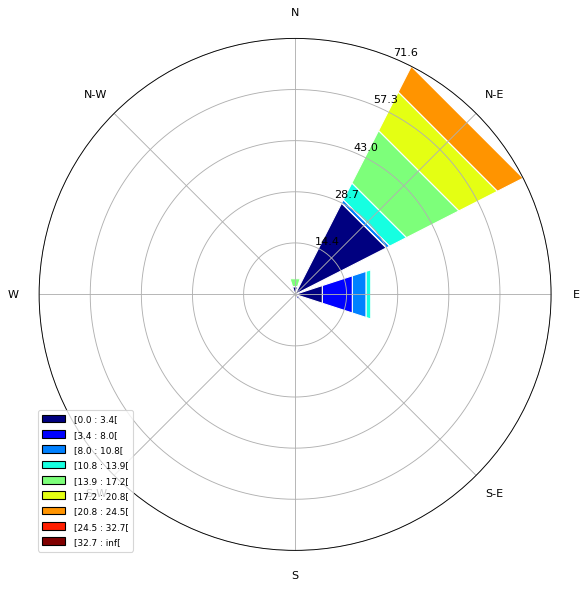

In [156]:
plt_windrose_transport(wind_dir_f, wind_speed_f)

In [157]:
js_str = classify_wind(wind_speed_f, wind_dir_f, js_str=True, percentage=True)
print(js_str)

var calm = [2, 3e+01, 8, 0.8, 0.0007, 0, 0, 0];
var breeze = [0, 1, 1e+01, 0.7, 0, 0, 0, 0];
var fresh_breeze = [0, 1, 4, 0, 0, 0, 0, 0];
var strong_breeze = [0.04, 5, 1, 0, 0, 0, 0, 0];
var high_wind = [2, 2e+01, 0.02, 0, 0, 0, 0, 0];
var gale = [0, 1e+01, 0, 0, 0, 0, 0, 0];
var strong_gale = [0.03, 8, 0, 0, 0, 0, 0, 0];
var storm = [0, 0, 0, 0, 0, 0, 0, 0];
var hurricane = [0, 0, 0, 0, 0, 0, 0, 0];


In [158]:
js_str = classify_snow_transport_cum(wind_speed_f, snow_dep_f, js_str=True, percentage=False)
print(js_str)

var no_transport = [0.006, 0, 0, 0, 0, 7, 2, 0.08];
var snowfall = [0.002, 0, 0, 0, 0, 1e+01, 3, 0.3];
var dry_snow = [0, 0, 0, 0, 0, 1e+01, 3, 0.02];
var wet_snow = [0, 0, 0, 0, 0, 1e+01, 2, 0];
var all_snow = [0, 0, 0, 0, 0, 1e+01, 0.4, 0];


In [149]:
dominant_dir = dominant_wind_hourly(wind_speed, wind_dir)
print(dominant_dir)

Dominant wind direction @ 0. hour: SE
Dominant wind direction @ 1. hour: S
Dominant wind direction @ 2. hour: S
Dominant wind direction @ 3. hour: S
Dominant wind direction @ 4. hour: S
Dominant wind direction @ 5. hour: SW
Dominant wind direction @ 6. hour: SW
Dominant wind direction @ 7. hour: SW
Dominant wind direction @ 8. hour: SW
Dominant wind direction @ 9. hour: SW
Dominant wind direction @ 10. hour: S
Dominant wind direction @ 11. hour: S
Dominant wind direction @ 12. hour: S
Dominant wind direction @ 13. hour: SE
Dominant wind direction @ 14. hour: SE
Dominant wind direction @ 15. hour: SE
Dominant wind direction @ 16. hour: SE
Dominant wind direction @ 17. hour: SE
Dominant wind direction @ 18. hour: SE
Dominant wind direction @ 19. hour: SE
Dominant wind direction @ 20. hour: SE
Dominant wind direction @ 21. hour: SE
Dominant wind direction @ 22. hour: SE
Dominant wind direction @ 23. hour: SE
['SE', 'S', 'S', 'S', 'S', 'SW', 'SW', 'SW', 'SW', 'SW', 'S', 'S', 'S', 'SE', 'SE

## Work in progress

In [141]:
############################
### GLEM DETTE FOR NÅ!!! ###
############################
def classify_snow_transport(wind_speed_f, wind_dir_f, js_str=True, percentage=True):
    """
    Classes with regard to transport-thresholds for different types of snow.
    """
    len_wind = len(wind_speed_f)
    
    # Seperate by wind direction - could be just done once prior to the separation between "wind speeds"/"threshold values".
    N = wind_speed_f[np.where((wind_dir_f>-22.5) & (wind_dir_f<=22.5))]

    NE = wind_speed_f[np.where((wind_dir_f>22.5) & (wind_dir_f<=67.5))]

    E = wind_speed_f[np.where((wind_dir_f>67.5) & (wind_dir_f<=112.5))]

    SE = wind_speed_f[np.where((wind_dir_f>112.5) & (wind_dir_f<=167.5))]

    S = wind_speed_f[np.where((wind_dir_f>167.5) & (wind_dir_f<=180.0) | (wind_dir_f>-167.5) & (wind_dir_f<=-180.0))]

    SW = wind_speed_f[np.where((wind_dir_f>-167.5) & (wind_dir_f<=-112.5))]

    W = wind_speed_f[np.where((wind_dir_f>-112.5) & (wind_dir_f<=-67.5))]

    NW = wind_speed_f[np.where((wind_dir_f>-67.5) & (wind_dir_f<=-22.5))]
    
    
    # Seperate by transport thresholds -> config file
    snowfall = 2.0
    loose_snow = 4.5
    bonded_snow = 6.5
    heavy = 10.7
    intense = 15.0
    
    if percentage:
        a = 100
    else:
        a = 24
    
    N_no_transport = len(N[np.where(N<no_transport)]) / len_wind * a
    N_snowfall = len(N[np.where((N>=snowfall))]) / len_wind * a
    N_dry_snow = len(N[np.where((N>=dry_snow))]) / len_wind * a
    N_wet_snow = len(N[np.where((N>=wet_snow))]) / len_wind * a
    N_all_snow = len(N[np.where((N>=all_snow))]) / len_wind * a
    
    NE_no_transport = len(NE[np.where(NE<no_transport)]) / len_wind * a
    NE_snowfall = len(NE[np.where((NE>=snowfall))]) / len_wind * a
    NE_dry_snow = len(NE[np.where((NE>=dry_snow))]) / len_wind * a
    NE_wet_snow = len(NE[np.where((NE>=wet_snow))]) / len_wind * a
    NE_all_snow = len(NE[np.where((NE>=all_snow))]) / len_wind * a
    
    E_no_transport = len(E[np.where(E<no_transport)]) / len_wind * a
    E_snowfall = len(E[np.where((E>=snowfall))]) / len_wind * a
    E_dry_snow = len(E[np.where((E>=dry_snow))]) / len_wind * a
    E_wet_snow = len(E[np.where((E>=wet_snow))]) / len_wind * a
    E_all_snow = len(E[np.where((E>=all_snow))]) / len_wind * a
    
    SE_no_transport = len(SE[np.where(SE<no_transport)]) / len_wind * a
    SE_snowfall = len(SE[np.where((SE>=snowfall))]) / len_wind * a
    SE_dry_snow = len(SE[np.where((SE>=dry_snow))]) / len_wind * a
    SE_wet_snow = len(SE[np.where((SE>=wet_snow))]) / len_wind * a
    SE_all_snow = len(SE[np.where((SE>=all_snow))]) / len_wind * a
    
    S_no_transport = len(S[np.where(S<no_transport)]) / len_wind * a
    S_snowfall = len(S[np.where((S>=snowfall))]) / len_wind * a
    S_dry_snow = len(S[np.where((S>=dry_snow))]) / len_wind * a
    S_wet_snow = len(S[np.where((S>=wet_snow))]) / len_wind * a
    S_all_snow = len(S[np.where((S>=all_snow))]) / len_wind * a

    SW_no_transport = len(SW[np.where(SW<no_transport)]) / len_wind * a
    SW_snowfall = len(SW[np.where((SW>=snowfall))]) / len_wind * a
    SW_dry_snow = len(SW[np.where((SW>=dry_snow))]) / len_wind * a
    SW_wet_snow = len(SW[np.where((SW>=wet_snow))]) / len_wind * a
    SW_all_snow = len(SW[np.where((SW>=all_snow))]) / len_wind * a
    
    W_no_transport = len(W[np.where(W<no_transport)]) / len_wind * a
    W_snowfall = len(W[np.where((W>=snowfall))]) / len_wind * a
    W_dry_snow = len(W[np.where((W>=dry_snow))]) / len_wind * a
    W_wet_snow = len(W[np.where((W>=wet_snow))]) / len_wind * a
    W_all_snow = len(W[np.where((W>=all_snow))]) / len_wind * a
    
    NW_no_transport = len(NW[np.where(NW<no_transport)]) / len_wind * a
    NW_snowfall = len(NW[np.where((NW>=snowfall))]) / len_wind * a
    NW_dry_snow = len(NW[np.where((NW>=dry_snow))]) / len_wind * a
    NW_wet_snow = len(NW[np.where((NW>=wet_snow))]) / len_wind * a
    NW_all_snow = len(NW[np.where((NW>=all_snow))]) / len_wind * a

    
    if js_str:
        str0 = "var no_transport = [{0:.1g}, {1:.1g}, {2:.1g}, {3:.1g}, {4:.1g}, {5:.1g}, {6:.1g}, {7:.1g}];".format(N_no_transport, NE_no_transport, E_no_transport, SE_no_transport, S_no_transport, SW_no_transport, W_no_transport, NW_no_transport)
        str1 = "var snowfall = [{0:.1g}, {1:.1g}, {2:.1g}, {3:.1g}, {4:.1g}, {5:.1g}, {6:.1g}, {7:.1g}];".format(N_snowfall, NE_snowfall, E_snowfall, SE_snowfall, S_snowfall, SW_snowfall, W_snowfall, NW_snowfall)
        str2 = "var dry_snow = [{0:.1g}, {1:.1g}, {2:.1g}, {3:.1g}, {4:.1g}, {5:.1g}, {6:.1g}, {7:.1g}];".format(N_dry_snow, NE_dry_snow, E_dry_snow, SE_dry_snow, S_dry_snow, SW_dry_snow, W_dry_snow, NW_dry_snow)
        str3 = "var wet_snow = [{0:.1g}, {1:.1g}, {2:.1g}, {3:.1g}, {4:.1g}, {5:.1g}, {6:.1g}, {7:.1g}];".format(N_wet_snow, NE_wet_snow, E_wet_snow, SE_wet_snow, S_wet_snow, SW_wet_snow, W_wet_snow, NW_wet_snow)
        str4 = "var all_snow = [{0:.1g}, {1:.1g}, {2:.1g}, {3:.1g}, {4:.1g}, {5:.1g}, {6:.1g}, {7:.1g}];".format(N_all_snow, NE_all_snow, E_all_snow, SE_all_snow, S_all_snow, SW_all_snow, W_all_snow, NW_all_snow)

        json_str = "{0}\n{1}\n{2}\n{3}\n{4}".format(str0, str1, str2, str3, str4)

        return json_str
    
    else:
        wind_classes = {"no_transport": [N_no_transport, NE_no_transport, E_no_transport, SE_no_transport, S_no_transport, SW_no_transport, W_no_transport, NW_no_transport],
                        "snowfall": [N_snowfall, NE_snowfall, E_snowfall, SE_snowfall, S_snowfall, SW_snowfall, W_snowfall, NW_snowfall],
                        "dry_snow": [N_dry_snow, NE_dry_snow, E_dry_snow, SE_dry_snow, S_dry_snow, SW_dry_snow, W_dry_snow, NW_dry_snow],
                        "wet_snow":[N_wet_snow, NE_wet_snow, E_wet_snow, SE_wet_snow, S_wet_snow, SW_wet_snow, W_wet_snow, NW_wet_snow],
                        "all_snow": [N_all_snow, NE_all_snow, E_all_snow, SE_all_snow, S_all_snow, SW_all_snow, W_all_snow, NW_all_snow]}
        
        return wind_classes